# Model Benchmarking

Here we compare the speed of the different model versions, specifically focussing on tokens/s.

Note, something to keep in mind is that having a faster model w.r.t tokens/s doesn't always mean it's better. For example, we may change something in the architecture that makes the model run slower but which produces a better model in the end. Nevertheless looking at tokens/s is still a fun and interesting comparison to make, especially for changes that do not change the learning characteristics of the model just make the underlying code more optimized, e.g. things like flash attention, and KV caching.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# Experiment params

# Params to fit on single RTX-2070 GPU with 8GB memory
# with a reasonable seq len
model_size = "gpt2"   # 124M
batch_size = 4
seq_len = 512
total_batch_size = 2048  # 4 * 512, single micro-batch
num_iterations = 100

# Results
# 't': mean iteration time (s)
# 'mem': peak GPU mem usage (MiB)
RESULTS = {
    "gpt2-base": {
        "t": 0.520131,   
        "mem": 5280,     
    },
    "gpt2-fp16": {
        "t": 0.249741,
        "mem": 5106,
    },
    "gpt2-compile": {
        "t": 0.445090,
        "mem": 4706,
    },
    "gpt2-flash": {
        "t": 0.469111,
        "mem": 4702,
    },
    "gpt2-fusedadam": {
        "t": 0.668300,
        "mem": 5280,
    },
    "gpt2-tensorcores": {
        "t": 0.499044,
        "mem": 5280,
    },
    "gpt2-fp16-compile": {
        "t": 0.174360,
        "mem": 4272,
    },
    "gpt2-fp16-flash": {
        "t": 0.213990,
        "mem": 4239,
    },
    "gpt2-fp16-fusedadam": {
        "t": 0.393054,
        "mem": 5106,
    },
    "gpt2-fp16-tensorcores": {
        "t": 0.255847,
        "mem": 5106,
    },
    "gpt2-fp16-compile-flash": {
        "t": 0.160837,
        "mem": 3404,
    },
    "gpt2-fp16-compile-flash-fusedadam": {
        "t": 0.291460,
        "mem": 3409,
    },
    "gpt2-fp16-compile-flash-tensorcores": {
        "t": 0.161451,
        "mem": 3400,
    },
}

# adamw:  | fused 
# foreach | True  | False | 
# True    | NA    | 517   |
# False   | 664   | 515   |
# None    | 769   | 520   |

Text(0, 0.5, 'Iteration time (s)')

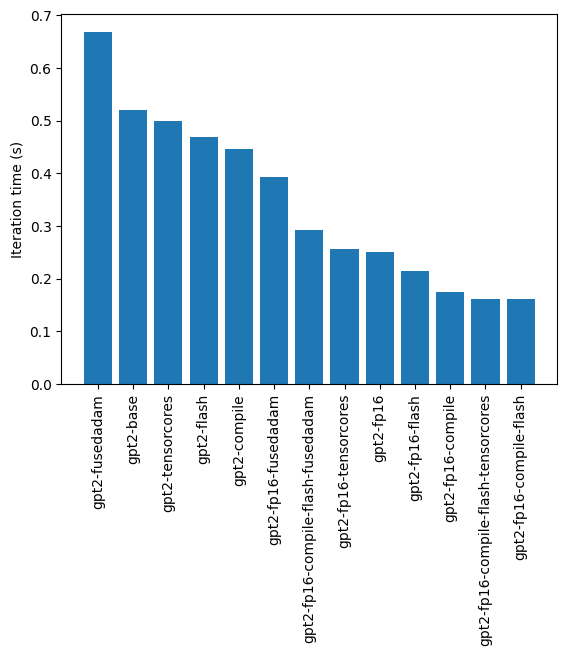

In [17]:
ly = [(v['t'], k) for k, v in RESULTS.items()]
ly.sort(reverse=True)
x = np.arange(len(ly))
plt.bar(x, [y for y, _ in ly], tick_label=[la for _, la in ly])
plt.xticks(rotation=90)
plt.ylabel("Iteration time (s)")

Text(0, 0.5, 'GPU Usage (MiB)')

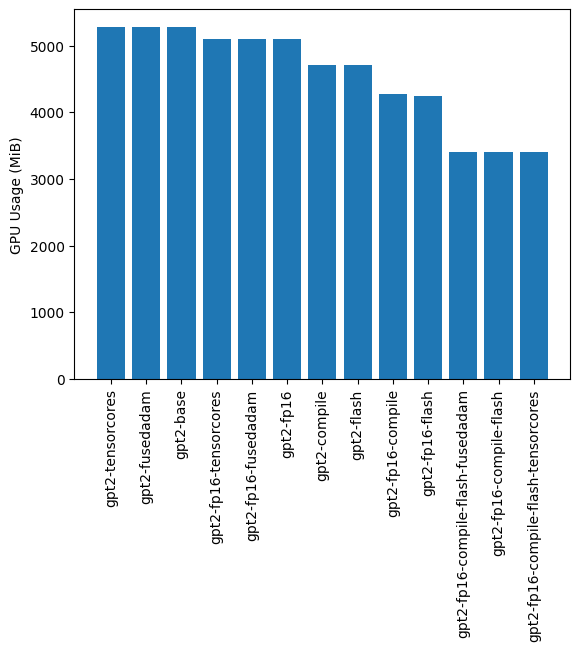

In [18]:
ly = [(v['mem'], k) for k, v in RESULTS.items()]
ly.sort(reverse=True)
x = np.arange(len(ly))
plt.bar(x, [y for y, _ in ly], tick_label=[la for _, la in ly])
plt.xticks(rotation=90)
plt.ylabel("GPU Usage (MiB)")

Text(0, 0.5, 'X Speedup over gpt2-base')

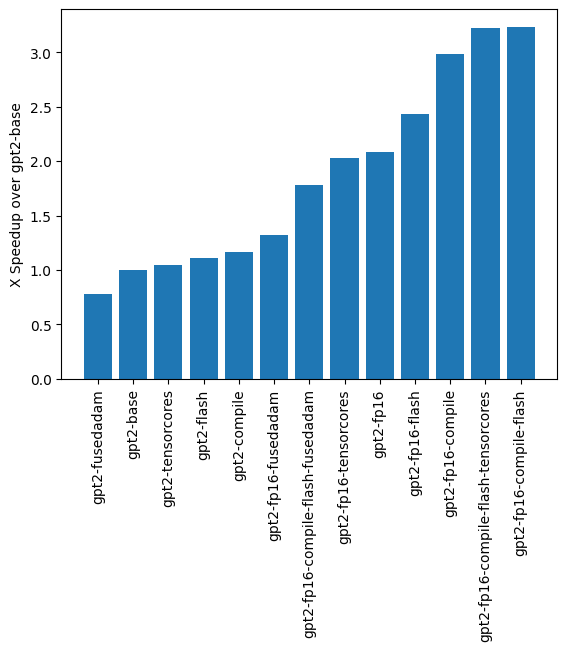

In [19]:
# Percent speed up over base
base_t = RESULTS["gpt2-base"]["t"]
ly = [(base_t/v['t'], k) for k, v in RESULTS.items()]
ly.sort()
x = np.arange(len(ly))
plt.bar(x, [y for y, _ in ly], tick_label=[la for _, la in ly])
plt.xticks(rotation=90)
plt.ylabel("X Speedup over gpt2-base")


Text(0, 0.5, 'X Memory saving over gpt2-base')

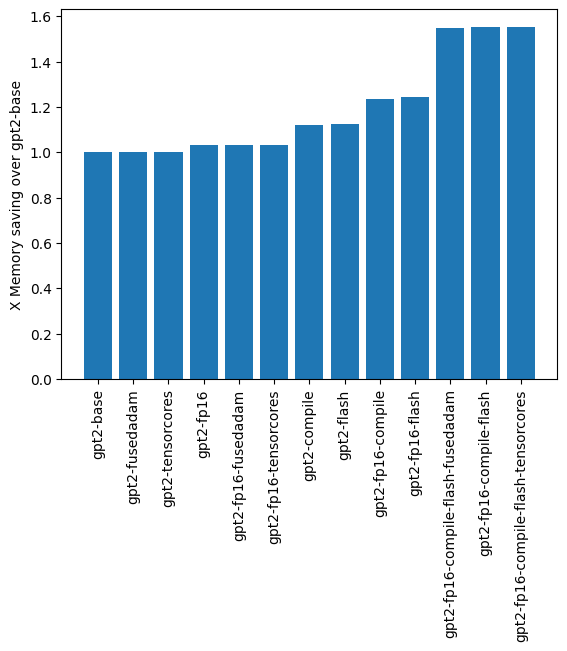

In [20]:
# Memory saving over base
base_t = RESULTS["gpt2-base"]["mem"]
ly = [(base_t/v['mem'], k) for k, v in RESULTS.items()]
ly.sort()
x = np.arange(len(ly))
plt.bar(x, [y for y, _ in ly], tick_label=[la for _, la in ly])
plt.xticks(rotation=90)
plt.ylabel("X Memory saving over gpt2-base")